# Machine Learning Cookbook

In [22]:
# inti pembelajaran
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import Matrix
from scipy import sparse
from sklearn.datasets import *
from sklearn.preprocessing import *
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import KMeans
from sklearn.feature_extraction import DictVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.pipeline import *
from sklearn.linear_model import *
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.decomposition import PCA
from scipy.stats import *

# tambahan pengetahuan
import re
from bs4 import BeautifulSoup
import sys
import unicodedata
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag

## 1. Vectors, Matrices, and Arrays

<img src='https://miro.medium.com/max/914/1*KxW0S6_4v0FXmRvPUJwzMA.png'>
NumPy is the foundation of the Python machine learning stack. NumPy allows for
efficient operations on the data structures often used in machine learning: vectors,
matrices, and tensors.

### 1.1 Membuat Vektor

In [5]:
# vektor sebagai baris
vector_row = np.array([1, 2, 3]) # or np.arange()

# vektor sebagai kolom
vector_column = np.array([[1],
                          [2],
                          [3]])

vector_row, vector_column

(array([1, 2, 3]),
 array([[1],
        [2],
        [3]]))

### 1.2 Membuat Matriks

In [31]:
matrix = np.array([[1, 2],
                   [3, 4],
                   [5, 6]])
Matrix(matrix)

Matrix([
[1, 2],
[3, 4],
[5, 6]])

*NumPy actually has a dedicated matrix data structure:*

In [12]:
matrix_object = np.mat([[1, 2],
                        [3, 4],
                        [5, 6]])

matrix_object 

matrix([[1, 2],
        [3, 4],
        [5, 6]])

However, the matrix data structure is not recommended for two reasons. First, arrays
are the de facto standard data structure of NumPy. Second, the vast majority of
NumPy operations return arrays, not matrix objects.

### 1.3 Membuat Sparse Matriks
Sparse Data adalah data yang sebagian besar memiliki elemen yang tidak digunakan (elemen yang tidak membawa informasi apa pun).

In [16]:
# matrix biasa
matrix = np.array([[0, 0],
                   [0, 1],
                   [3, 0]])

# create sparse matrix
matrix_sparse = sparse.csr_matrix(matrix)

print(matrix_sparse)

  (1, 1)	1
  (2, 0)	3


data di atas dapat dibaca:
* pada baris ke 1 kolom ke 1 terdapat nilai 1
* pada baris ke 2 kolom ke 0 terdapat nilai 3

### 1.4 Memilih Element pada Matriks

In [4]:
# Create row vector
vector = np.array([1, 2, 3, 4, 5, 6])

# Create matrix
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# Select third element of vector
print(vector[2])

3


In [3]:
# Select second row, second column
print(matrix[1,1])

5


In [25]:
# Select all elements of a vector
print(vector[:])

[1 2 3 4 5 6]


In [26]:
# Select everything up to and including the third element
print(vector[:3])

[1 2 3]


In [27]:
# Select everything after the third element
print(vector[3:])

[4 5 6]


In [28]:
# Select the last element
print(vector[-1])

6


In [29]:
# Select the first two rows and all columns of a matrix
print(matrix[:2,:])

[[1 2 3 4]
 [5 6 7 8]]


In [30]:
# Select all rows and the second column
print(matrix[:,1:2])

[[ 2]
 [ 6]
 [10]]


### 1.5 Describing a Matrix

In [5]:
# creating matrix
matrix = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12]])

Matrix(matrix)

Matrix([
[1,  2,  3,  4],
[5,  6,  7,  8],
[9, 10, 11, 12]])

In [6]:
# View number of rows and columns
matrix.shape

(3, 4)

In [7]:
# View number of elements (rows * columns)
matrix.size

12

In [8]:
# View number of dimensions
matrix.ndim

2

### 1.6 Applying Operations to Elements

In [35]:
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

Matrix(matrix)

Matrix([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])

In [37]:
# Create function that adds 100 to something
add_100 = lambda i: i + 100

# Create vectorized function
vectorized_add_100 = np.vectorize(add_100)

# Apply function to all elements in matrix
vectorized_add_100(matrix)

array([[101, 102, 103],
       [104, 105, 106],
       [107, 108, 109]])

NumPy’s vectorize class converts a function into a function that can apply to all elements in an array or slice of an array. It’s worth noting that vectorize is essentially a
for loop over the elements and does not increase performance. Furthermore, NumPy
arrays allow us to perform operations between arrays even if their dimensions are not
the same (a process called broadcasting)

In [39]:
# Add 100 to all elements
matrix + 100

array([[101, 102, 103],
       [104, 105, 106],
       [107, 108, 109]])

### 1.7 Finding the Maximum and Minimum Values

In [40]:
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

Matrix(matrix)

Matrix([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])

In [41]:
# Return maximum element
np.max(matrix)

9

In [42]:
# Return minimum element
np.min(matrix)

1

### 1.8 Average, Variance, and Standard Deviation

In [43]:
Matrix(matrix)

Matrix([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])

In [44]:
# Return mean
np.mean(matrix)

5.0

In [50]:
# Find the mean value in each column
np.mean(matrix, axis=0)

array([4., 5., 6.])

In [45]:
# Return variance
np.var(matrix)

6.666666666666667

In [46]:
# Return standard deviation
np.std(matrix)

2.581988897471611

### 1.9 Reshaping Arrays

In [51]:
# Create 4x3 matrix
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [10, 11, 12]])

Matrix(matrix)

Matrix([
[ 1,  2,  3],
[ 4,  5,  6],
[ 7,  8,  9],
[10, 11, 12]])

In [52]:
# Reshape matrix into 2x6 matrix
matrix.reshape(2, 6)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

*One useful argument in reshape is -1, which effectively means “as many as needed,”
so reshape(-1, 1) means one row and as many columns as needed:*

In [55]:
matrix.reshape(1, -1)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

### 1.10 Transposing a Vector or Matrix

In [9]:
# Create matrix
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

Matrix(matrix)

Matrix([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])

In [10]:
# Transpose matrix
matrix.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [11]:
# cara lain
np.transpose(matrix)

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [58]:
# vektor tidak akan bisa ditranspose
np.array([1, 2, 3, 4, 5, 6]).T

array([1, 2, 3, 4, 5, 6])

In [61]:
# vektor baris menjadi vektor kolom
np.array([[1, 2, 3, 4, 5, 6]]).T

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

### 1.11 Flattening a Matrix
transform a matrix into a one-dimensional array

In [62]:
Matrix(matrix)

Matrix([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])

In [63]:
# Flatten matrix
matrix.flatten()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [64]:
# Ravel matrix
matrix.ravel()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

### 1.12 Calculating the Determinant

In [65]:
Matrix(matrix)

Matrix([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])

In [66]:
# Return determinant of matrix
np.linalg.det(matrix)

-9.51619735392994e-16

### 1.13 Getting the Diagonal of a Matrix

In [67]:
Matrix(matrix)

Matrix([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])

In [68]:
# Return diagonal elements
matrix.diagonal()

array([1, 5, 9])

### 1.4  Calculating Dot Products

In [69]:
# Create two vectors
vector_a = np.array([1,2,3])
vector_b = np.array([4,5,6])

In [70]:
# Calculate dot product
# vector_a.dot(vector_b)
np.dot(vector_a, vector_b)

32

In [71]:
# another option
vector_a @ vector_b

32

### 1.15 Inverting a Matrix

In [84]:
matrix = np.array([[5, 2],
                   [4, 1]])

Matrix(matrix)

Matrix([
[5, 2],
[4, 1]])

In [85]:
# Calculate inverse of matrix
np.linalg.inv(matrix)

array([[-0.33333333,  0.66666667],
       [ 1.33333333, -1.66666667]])

In [86]:
# Multiply matrix and its inverse
matrix @ np.linalg.inv(matrix)

array([[1., 0.],
       [0., 1.]])

### 1.16 Generating Random Values

In [93]:
# Set seed
np.random.seed(0)

# Generate three random floats between 0.0 and 1.0
np.random.random(3)

array([0.5488135 , 0.71518937, 0.60276338])

In [92]:
# Generate three random integers between 1 and 10
np.random.randint(0, 11, 3)

array([3, 7, 9])

In [94]:
# Draw three numbers from a normal distribution with mean 0.0
# and standard deviation of 1.0
np.random.normal(0.0, 1.0, 3)

array([-2.2683282 ,  1.33354538, -0.84272405])

In [95]:
# Draw three numbers from a logistic distribution with mean 0.0 and scale of 1.0
np.random.logistic(0.0, 1.0, 3)

array([ 2.10898075,  3.2778983 , -0.47496606])

In [96]:
# Draw three numbers greater than or equal to 1.0 and less than 2.0
np.random.uniform(1.0, 2.0, 3)

array([1.79172504, 1.52889492, 1.56804456])

## 2. Load Datasets
The first step in any machine learning endeavor is to get the raw data into our system.
The raw data might be a logfile, dataset file, or database.

### 2.1 Creating a Simulated Dataset

In [22]:
# creating regression datasets
explanatory, response, coeficients = make_regression(n_samples=100,
                                                     n_features=3,
                                                     n_informative=3,
                                                     n_targets=1,
                                                     noise=0.0,
                                                     coef=True,
                                                     random_state=1)

# View feature matrix and target vector
print('Explanatory Matrix:\n', explanatory[:5])
print('Response Vector:\n', response[:5])

Explanatory Matrix:
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]
 [ 0.12910158  0.50274088  1.6169496 ]
 [-0.69166075 -0.6871727  -0.39675353]]
Response Vector:
 [ -10.37865986   25.5124503    19.67705609  149.50205427 -121.65210879]


In [20]:
# creating classification datasets
# Generate features matrix and target vector
features, target = make_classification(n_samples = 100,
                                       n_features = 3,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.25, .75],
                                       random_state = 1)

# View feature matrix and target vector
print('Feature Matrix:\n', features[:3])
print('Target Vector:\n', target[:3])

Feature Matrix:
 [[ 1.06354768 -1.42632219  1.02163151]
 [ 0.23156977  1.49535261  0.33251578]
 [ 0.15972951  0.83533515 -0.40869554]]
Target Vector:
 [1 0 0]


if we want a dataset designed to work well with clustering techniques, scikitlearn offers `make_blobs`:

In [25]:
# Generate feature matrix and target vector
features, target = make_blobs(n_samples = 100,
                              n_features = 2,
                              centers = 3,
                              cluster_std = 0.5,
                              shuffle = True,
                              random_state = 1)

# View feature matrix and target vector
print('Feature Matrix:\n', features[:3])
print('Target Vector:\n', target[:3])

Feature Matrix:
 [[ -1.22685609   3.25572052]
 [ -9.57463218  -4.38310652]
 [-10.71976941  -4.20558148]]
Target Vector:
 [0 1 1]


In make_regression and make_classification, n_informative determines the
number of features that are used to generate the target vector. If n_informative is less
than the total number of features (n_features), the resulting dataset will have redun‐
dant features that can be identified through feature selection techniques. <br><br>
In addition, make_classification contains a weights parameter that allows us to
simulate datasets with imbalanced classes. For example, weights = [.25, .75]
would return a dataset with 25% of observations belonging to one class and 75% of
observations belonging to a second class

## 3. Data Wrangling
Data wrangling is a broad term used, often informally, to describe the process of
transforming raw data to a clean and organized format ready for use. 

### 3.1 Creating a Data Frame

In [26]:
# Create DataFrame
dataframe = pd.DataFrame()

# Add columns
dataframe['Name'] = ['Jacky Jackson', 'Steven Stevenson']
dataframe['Age'] = [38, 25]
dataframe['Driver'] = [True, False]

# Show DataFrame
dataframe

,Name,Age,Driver
0,Jacky Jackson,38,True
1,Steven Stevenson,25,False


Alternatively, once we have created a DataFrame object, we can append new rows to
the bottom:

In [31]:
# Create row
new_person = pd.Series(['Molly Mooney', 40, True], index=['Name','Age','Driver'])

# Append row
dataframe.append(new_person, ignore_index=True)

,Name,Age,Driver
0,Jacky Jackson,38,True
1,Steven Stevenson,25,False
2,Molly Mooney,40,True


### 3.2 Describing the Data

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/chrisalbon/simulated_datasets/master/titanic.csv')

df.head(3)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0,0


In [36]:
# Show dimensions
df.shape

(1313, 6)

Additionally, we can get descriptive statistics for any numeric columns using
describe:

In [37]:
# Show statistics
df.describe()

,Age,Survived,SexCode
count,756.000000,1313.000000,1313.000000
mean,30.397989,0.342727,0.351866
std,14.259049,0.474802,0.477734
min,0.170000,0.000000,0.000000
25%,21.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000
75%,39.000000,1.000000,1.000000
max,71.000000,1.000000,1.000000


### 3.3 Navigating DataFrames

In [43]:
# select first row
df.iloc[0]

Name        Allen, Miss Elisabeth Walton
PClass                               1st
Age                                 29.0
Sex                               female
Survived                               1
SexCode                                1
Name: 0, dtype: object

In [44]:
# Select three rows
df.iloc[1:4]

,Name,PClass,Age,Sex,Survived,SexCode
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.0,female,0,1


In [47]:
# Select three rows
df.iloc[:3]

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0,0


DataFrames do not need to be numerically indexed. We can set the index of a Data‐
Frame to any value where the value is unique to each row. For example, we can set the
index to be passenger names and then select rows using a name:

In [49]:
# Set index
df = df.set_index(df['Name'])

# Show row
df.loc['Allen, Miss Elisabeth Walton']

Name        Allen, Miss Elisabeth Walton
PClass                               1st
Age                                 29.0
Sex                               female
Survived                               1
SexCode                                1
Name: Allen, Miss Elisabeth Walton, dtype: object

* loc is useful when the index of the DataFrame is a label (e.g., a string).
* iloc works by looking for the position in the DataFrame. For example, iloc[0]
will return the first row regardless of whether the index is an integer or a label.

### 3.4 Selecting Rows Based on Conditionals

In [55]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/chrisalbon/simulated_datasets/master/titanic.csv')

# Show top two rows where column 'sex' is 'female'
dataframe[dataframe['Sex'] == 'female'].head(2)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1


Multiple conditions are easy as well. For example, here we select all the rows where
the passenger is a female 65 or older:

In [59]:
# Filter rows
dataframe[(dataframe['Sex'] == 'female') & (dataframe['Age'] >= 65)]

,Name,PClass,Age,Sex,Survived,SexCode
73,"Crosby, Mrs Edward Gifford (Catherine Elizabet...",1st,69.0,female,1,1


### 3.5 Replacing Values

In [61]:
# Replace values, show two rows
dataframe['Sex'].replace("female", "Woman").head(2)

0    Woman
1    Woman
Name: Sex, dtype: object

In [62]:
# Replace "female" and "male with "Woman" and "Man"
dataframe['Sex'].replace(["female", "male"], ["Woman", "Man"]).head(5)

0    Woman
1    Woman
2      Man
3    Woman
4      Man
Name: Sex, dtype: object

replace also accepts regular expressions

In [72]:
# Replace values, show two rows
dataframe.replace(r"1st", "First", regex=True).head(2)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",First,29.0,female,1,1
1,"Allison, Miss Helen Loraine",First,2.0,female,0,1


### 3.6 Renaming Columns

In [66]:
# Rename column, show two rows
dataframe.rename(columns={'PClass': 'Passenger Class'}).head(2)

,Name,Passenger Class,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1


Notice that the rename method can accept a dictionary as a parameter. We can use the
dictionary to change multiple column names at once:

In [67]:
# Rename columns, show two rows
dataframe.rename(columns={'PClass': 'Passenger Class', 'Sex': 'Gender'}).head(2)

,Name,Passenger Class,Age,Gender,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1


### 3.7 Finding the Minimum, Maximum, Sum, Average, and Count

In [68]:
# Calculate statistics
print('Maximum\t:', dataframe['Age'].max())
print('Minimum\t:', dataframe['Age'].min())
print('Mean\t:', dataframe['Age'].mean())
print('Sum\t:', dataframe['Age'].sum())
print('Count\t:', dataframe['Age'].count())

Maximum	: 71.0
Minimum	: 0.17
Mean	: 30.397989417989415
Sum	: 22980.88
Count	: 756


### 3.8 Finding Unique Values

In [73]:
# Select unique values
dataframe['Sex'].unique()

array(['female', 'male'], dtype=object)

Alternatively, `value_counts` will display all unique values with the number of times
each value appears:

In [74]:
# Show counts
dataframe['Sex'].value_counts()

male      851
female    462
Name: Sex, dtype: int64

### 3.9 Handling Missing Values

In [77]:
## Select missing values, show two rows
dataframe[dataframe['Age'].isnull()].head(3)

,Name,PClass,Age,Sex,Survived,SexCode
12,"Aubert, Mrs Leontine Pauline",1st,NaN,female,1,1
13,"Barkworth, Mr Algernon H",1st,NaN,male,1,0
14,"Baumann, Mr John D",1st,NaN,male,0,0


In [83]:
# melihat columns with missing value
dataframe.isnull().any()

Name        False
PClass      False
Age          True
Sex         False
Survived    False
SexCode     False
dtype: bool

Oftentimes a dataset uses a specific value to denote a missing observation, such as
NONE, -999, or .. pandas’ `read_csv` includes a parameter allowing us to specify the
values used to indicate missing values:

In [90]:
# Load data, set missing values
url = 'https://raw.githubusercontent.com/chrisalbon/simulated_datasets/master/titanic.csv'
dataframe = pd.read_csv(url, na_values=[np.nan, 'NONE', -999])

dataframe[dataframe['Age'].isnull()].head(3)

,Name,PClass,Age,Sex,Survived,SexCode
12,"Aubert, Mrs Leontine Pauline",1st,NaN,female,1,1
13,"Barkworth, Mr Algernon H",1st,NaN,male,1,0
14,"Baumann, Mr John D",1st,NaN,male,0,0


### 3.10 Deleting a Column

In [91]:
dataframe = pd.read_csv(url)

# Delete column
dataframe.drop('Age', axis=1).head(2)

,Name,PClass,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,female,1,1
1,"Allison, Miss Helen Loraine",1st,female,0,1


You can also use a list of column names as the main argument to drop multiple columns at once:

In [93]:
# Drop columns
dataframe.drop(['Age', 'Sex'], axis=1).head(2)

,Name,PClass,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,1,1
1,"Allison, Miss Helen Loraine",1st,0,1


If a column does not have a name (which can sometimes happen), you can drop it by
its column index using `dataframe.columns`:

In [95]:
# Drop column
dataframe.drop(dataframe.columns[0], axis=1).head(2)

,PClass,Age,Sex,Survived,SexCode
0,1st,29.0,female,1,1
1,1st,2.0,female,0,1


### 3.11 Deleting a Row

In [99]:
# Delete rows, show first two rows of output
dataframe[dataframe['Sex'] != 'male'].tail(3)

,Name,PClass,Age,Sex,Survived,SexCode
1304,"Yasbeck, Mrs Antoni",3rd,15.0,female,1,1
1306,"Zabour, Miss Hileni",3rd,NaN,female,0,1
1307,"Zabour, Miss Tamini",3rd,NaN,female,0,1


While technically you can use the drop method (for example, df.drop([0, 1],
axis=0) to drop the first two rows), a more practical method is simply to wrap a
boolean condition inside df[]. The reason is because we can use the power of conditionals to delete either a single row or (far more likely) many rows at once

In [100]:
# Delete row, show first two rows of output
dataframe[dataframe['Name'] != 'Allison, Miss Helen Loraine'].head(2)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0,0


In [101]:
# Delete row, show first two rows of output
dataframe[dataframe.index != 0].head(2)

,Name,PClass,Age,Sex,Survived,SexCode
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0,0


### 3.12 Dropping Duplicate Rows

In [104]:
# Drop duplicates, show first two rows of output
dataframe.drop_duplicates().head(2)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1


A keen reader will notice that the solution didn’t actually drop any rows:

In [105]:
# Show number of rows
print("Number Of Rows In The Original DataFrame:", len(dataframe))
print("Number Of Rows After Deduping:", len(dataframe.drop_duplicates()))

Number Of Rows In The Original DataFrame: 1313
Number Of Rows After Deduping: 1313


The reason is because `drop_duplicates` defaults to only dropping rows that match
perfectly across all columns. Under this condition, every row in our DataFrame, data
frame, is actually unique. However, often we want to consider only a subset of columns to check for duplicate rows. We can accomplish this using the subset parameter:

In [106]:
# Drop duplicates
dataframe.drop_duplicates(subset=['Sex'])

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0,0


Take a close look at the preceding output: we told drop_duplicates to only consider
any two rows with the same value for Sex to be duplicates and to drop them. Now we
are left with a DataFrame of only two rows: one man and one woman. You might be
asking why drop_duplicates decided to keep these two rows instead of two different
rows. The answer is that drop_duplicates defaults to keeping the first occurrence of
a duplicated row and dropping the rest. We can control this behavior using the keep
parameter:

In [107]:
# Drop duplicates
dataframe.drop_duplicates(subset=['Sex'], keep='last')

,Name,PClass,Age,Sex,Survived,SexCode
1307,"Zabour, Miss Tamini",3rd,NaN,female,0,1
1312,"Zimmerman, Leo",3rd,29.0,male,0,0


### 3.13 Grouping Rows by Values

In [108]:
# Group rows by the values of the column 'Sex', calculate mean
# of each group
dataframe.groupby('Sex').mean()

,Age,Survived,SexCode
Sex,,,
female,29.396424,0.666667,1.0
male,31.014338,0.166863,0.0


When talking about grouping we often
use shorthand and say “group by gender,” but that is incomplete. For grouping to be useful, we need to group by something and then apply a function to each of those
groups:

In [109]:
# Group rows, count rows
dataframe.groupby('Survived')['Name'].count()

Survived
0    863
1    450
Name: Name, dtype: int64

*In this case we group the data into survived or not, then count the number of names (i.e.,
passengers) in each group.*

In [112]:
dataframe.groupby('SexCode')['Name'].count()

SexCode
0    851
1    462
Name: Name, dtype: int64

### 3.14 Grouping Rows by Time

In [113]:
# Create date range
time_index = pd.date_range('06/06/2017', periods=100000, freq='30S')

# Create DataFrame
dataframe = pd.DataFrame(index=time_index)

# Create column of random values
dataframe['Sale_Amount'] = np.random.randint(1, 10, 100000)

# show dataframe
dataframe.head()

,Sale_Amount
2017-06-06 00:00:00,3
2017-06-06 00:00:30,1
2017-06-06 00:01:00,2
2017-06-06 00:01:30,4
2017-06-06 00:02:00,9


In [114]:
# Group rows by week, calculate sum per week
dataframe.resample('W').sum()

,Sale_Amount
2017-06-11,86297
2017-06-18,101097
2017-06-25,100959
2017-07-02,100708
2017-07-09,100414
2017-07-16,10450


In [115]:
# Group by two weeks, calculate mean
dataframe.resample('2W').mean()

,Sale_Amount
2017-06-11,4.994039
2017-06-25,5.011310
2017-07-09,4.988145
2017-07-23,5.024038


In [116]:
# Group by month, count rows
dataframe.resample('M').count()

,Sale_Amount
2017-06-30,72000
2017-07-31,28000


### 3.15 Looping Over a Column

In [117]:
# Load data
dataframe = pd.read_csv(url)

# Print first two names uppercased
for name in dataframe['Name'][0:2]:
     print(name.upper())

ALLEN, MISS ELISABETH WALTON
ALLISON, MISS HELEN LORAINE


In [118]:
# Using list comprehension
[name.upper() for name in dataframe['Name'][0:2]]

['ALLEN, MISS ELISABETH WALTON', 'ALLISON, MISS HELEN LORAINE']

### 3.16 Applying a Function Over All Elements in a Column

In [119]:
# define a function
uppercase = lambda x: x.upper()

In [120]:
# Apply function, show two rows
dataframe['Name'].apply(uppercase)[0:2]

0    ALLEN, MISS ELISABETH WALTON
1     ALLISON, MISS HELEN LORAINE
Name: Name, dtype: object

### 3.17 Applying a Function to Groups

In [121]:
# Group rows, apply function to groups
dataframe.groupby('Sex').apply(lambda x: x.count())

,Name,PClass,Age,Sex,Survived,SexCode
Sex,,,,,,
female,462,462,288,462,462,462
male,851,851,468,851,851,851


### 3.18 Concatenating DataFrames

In [122]:
# Create Dataframe
data_a = {'id': ['1', '2', '3'],
         'first': ['Alex', 'Amy', 'Allen'],
         'last': ['Anderson', 'Ackerman', 'Ali']}
dataframe_a = pd.DataFrame(data_a, columns = ['id', 'first', 'last'])

# Create DataFrame
data_b = {'id': ['4', '5', '6'],
         'first': ['Billy', 'Brian', 'Bran'],
         'last': ['Bonder', 'Black', 'Balwner']}
dataframe_b = pd.DataFrame(data_b, columns = ['id', 'first', 'last'])

# Concatenate DataFrames by rows
pd.concat([dataframe_a, dataframe_b], axis=0)

,id,first,last
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner


In [123]:
# Concatenate DataFrames by columns
pd.concat([dataframe_a, dataframe_b], axis=1)

,id,first,last,id,first,last
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner


Alternatively we can use append to add a new row to a DataFrame:

In [125]:
# Create row
row = pd.Series([10, 'Chris', 'Chillon'], index=['id', 'first', 'last'])

# Append row
dataframe_a.append(row, ignore_index=True)

,id,first,last
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,10,Chris,Chillon


### 3.19 Merging DataFrames

In [126]:
# Create DataFrame
employee_data = {'employee_id': ['1', '2', '3', '4'],
                 'name': ['Amy Jones', 'Allen Keys', 'Alice Bees',
                 'Tim Horton']}
dataframe_employees = pd.DataFrame(employee_data, columns = ['employee_id','name'])

# Create DataFrame
sales_data = {'employee_id': ['3', '4', '5', '6'],
              'total_sales': [23456, 2512, 2345, 1455]}
dataframe_sales = pd.DataFrame(sales_data, columns = ['employee_id','total_sales'])

# Merge DataFrames
pd.merge(dataframe_employees, dataframe_sales, on='employee_id')

,employee_id,name,total_sales
0,3,Alice Bees,23456
1,4,Tim Horton,2512


merge defaults to inner joins. If we want to do an outer join, we can specify that with
the how parameter:

In [127]:
# Merge DataFrames
pd.merge(dataframe_employees, dataframe_sales, on='employee_id', how='outer')

,employee_id,name,total_sales
0,1,Amy Jones,NaN
1,2,Allen Keys,NaN
2,3,Alice Bees,23456.0
3,4,Tim Horton,2512.0
4,5,NaN,2345.0
5,6,NaN,1455.0


The same parameter can be used to specify left and right joins:

In [128]:
# Merge DataFrames
pd.merge(dataframe_employees, dataframe_sales, on='employee_id', how='left')

,employee_id,name,total_sales
0,1,Amy Jones,NaN
1,2,Allen Keys,NaN
2,3,Alice Bees,23456.0
3,4,Tim Horton,2512.0


We can also specify the column name in each DataFrame to merge on:

In [129]:
# Merge DataFrames
pd.merge(dataframe_employees,
         dataframe_sales,
         left_on='employee_id',
         right_on='employee_id')

,employee_id,name,total_sales
0,3,Alice Bees,23456
1,4,Tim Horton,2512


## 4. Handling Numerical Data
Quantitative data is the measurement of something—whether class size, monthly
sales, or student scores. The natural way to represent these quantities is numerically
(e.g., 29 students, $529,392 in sales). 

### 4.1 Rescaling a Feature

In [136]:
# Create feature
feature = np.array([[-500.5],
                    [-100.1],
                    [0],
                    [100.1],
                    [900.9]])

# Create scaler
minmax_scale = MinMaxScaler(feature_range=(0, 1))

# Scale feature
scaled_feature = minmax_scale.fit_transform(feature)

# Show feature
scaled_feature

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

<img src='minmax.png'>
where x is the feature vector, x’i
 is an individual element of feature x, and x’i
 is the
rescaled element. In our example, we can see from the outputted array that the fea‐
ture has been successfully rescaled to between 0 and 1:


### 4.2 Standardizing a Feature
You want to transform a feature to have a mean of 0 and a standard deviation of 1 (using z-score).

In [137]:
# Create feature
x = np.array([[-1000.1],
              [-200.2],
              [500.5],
              [600.6],
              [9000.9]])

# Create scaler
scaler = StandardScaler()

# Transform the feature
standardized = scaler.fit_transform(x)

# Show feature
standardized 

array([[-0.76058269],
       [-0.54177196],
       [-0.35009716],
       [-0.32271504],
       [ 1.97516685]])

<img src='standard.png'>
where x’i
 is our standardized form of xi
. The transformed feature represents the num‐
ber of standard deviations the original value is away from the feature’s mean value
(also called a z-score in statistics).

In [138]:
# Print mean and standard deviation
print("Mean:", round(standardized.mean()))
print("Standard deviation:", standardized.std())

Mean: 0
Standard deviation: 1.0


If our data has significant outliers, it can negatively impact our standardization by
affecting the feature’s mean and variance. In this scenario, it is often helpful to instead
rescale the feature using the median and quartile range. In scikit-learn, we do this
using the RobustScaler method:

In [140]:
# Create scaler
robust_scaler = RobustScaler()

# Transform feature
robust_scaler.fit_transform(x)

array([[-1.87387612],
       [-0.875     ],
       [ 0.        ],
       [ 0.125     ],
       [10.61488511]])

### 4.3 Normalizing Observations
rescale the feature values of observations to have unit norm (a total
length of 1).

In [142]:
# Create feature matrix
features = np.array([[0.5, 0.5],
                     [1.1, 3.4],
                     [1.5, 20.2],
                     [1.63, 34.4],
                     [10.9, 3.3]])

# Create normalizer
normalizer = Normalizer(norm="l2")

# Transform feature matrix
normalizer.transform(features)

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

<img src='l2.png'>
where x is an individual observation and xn is that observation’s value for the nth feature.

In [143]:
# Transform feature matrix
features_l2_norm = Normalizer(norm="l2").transform(features)

# Show feature matrix
features_l2_norm

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

 Manhattan norm (L1)
<img src='l1.png'>

In [145]:
# Transform feature matrix
features_l1_norm = Normalizer(norm="l1").transform(features)

# Show feature matrix
features_l1_norm

array([[0.5       , 0.5       ],
       [0.24444444, 0.75555556],
       [0.06912442, 0.93087558],
       [0.04524008, 0.95475992],
       [0.76760563, 0.23239437]])

Intuitively, L2 norm can be thought of as the distance between two points in New
York for a bird (i.e., a straight line), while L1 can be thought of as the distance for a
human walking on the street (walk north one block, east one block, north one block,
east one block, etc.), which is why it is called “Manhattan norm” or “Taxicab norm.”

### 4.4 Generating Polynomial and Interaction Features

In [147]:
# Create feature matrix
features = np.array([[2, 3],
                     [2, 3],
                     [2, 3]])

# Create PolynomialFeatures object
polynomial_interaction = PolynomialFeatures(degree=2, include_bias=False)

# Create polynomial features
polynomial_interaction.fit_transform(features)

array([[2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.]])

### 4.5 Transforming Features
 want to make a custom transformation to one or more features.

In [151]:
# Create feature matrix
features = np.array([[2, 3],
                     [2, 3],
                     [2, 3]])

# define simple function
add_ten = lambda x: x + 10

# Create transformer
ten_transformer = FunctionTransformer(add_ten)

# Transform feature matrix
ten_transformer.transform(features)

array([[12, 13],
       [12, 13],
       [12, 13]])

### 4.6 Detecting Outliers

In [155]:
# Create simulated data
features, _ = make_blobs(n_samples = 10,
                         n_features = 2,
                         centers = 1,
                         random_state = 1)

# Replace the first observation's values with extreme values
features[0,0] = 10000
features[0,1] = 10000
outlier_detector = EllipticEnvelope(contamination=.1)

# Fit detector
outlier_detector.fit(features)

# Predict outliers
outlier_detector.predict(features)

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

1 is inlier and -1 is outlier<br><br>
Instead of looking at observations as a whole, we can instead look at individual features and identify extreme values in those features using interquartile range (IQR):


In [157]:
# Create one feature
feature = features[:,0]

# Create a function to return index of outliers
def indicies_of_outliers(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))

# Run function
indicies_of_outliers(feature)

(array([0], dtype=int64),)

Outliers are commonly defined as any value 1.5
IQRs less than the first quartile or 1.5 IQRs greater than the third quartile.

### 4.7 Handling Outliers
Typically we have three strategies we can use to handle outliers. First, we can drop
them:

In [158]:
# Create DataFrame
houses = pd.DataFrame()
houses['Price'] = [534433, 392333, 293222, 4322032]
houses['Bathrooms'] = [2, 3.5, 2, 116]
houses['Square_Feet'] = [1500, 2500, 1500, 48000]

# Filter observations
houses[houses['Bathrooms'] < 20]

,Price,Bathrooms,Square_Feet
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500


Second, we can mark them as outliers and include it as a feature:

In [159]:
# Create feature based on boolean condition
houses["Outlier"] = np.where(houses["Bathrooms"] < 20, 0, 1)

# Show data
houses

,Price,Bathrooms,Square_Feet,Outlier
0,534433,2.0,1500,0
1,392333,3.5,2500,0
2,293222,2.0,1500,0
3,4322032,116.0,48000,1


Finally, we can transform the feature to dampen the effect of the outlier:

In [161]:
# Log feature
houses["Log_Of_Square_Feet"] = [np.log(x) for x in houses["Square_Feet"]]

# Show data
houses

,Price,Bathrooms,Square_Feet,Outlier,Log_Of_Square_Feet
0,534433,2.0,1500,0,7.313220
1,392333,3.5,2500,0,7.824046
2,293222,2.0,1500,0,7.313220
3,4322032,116.0,48000,1,10.778956


### 4.8 Discretizating Features

In [173]:
# Create feature
age = np.array([[6],
               [12],
               [19],
               [36],
               [65],
               [18]])

# Create binarizer
binarizer = Binarizer(threshold=18) # 0 = <18

# Transform feature
binarizer.fit_transform(age)

array([[0],
       [0],
       [1],
       [1],
       [1],
       [0]])

Second, we can break up numerical features according to multiple thresholds:

In [174]:
# Bin feature
np.digitize(age, bins=[20,30,64])

array([[0],
       [0],
       [0],
       [2],
       [3],
       [0]], dtype=int64)

### 4.9 Grouping Observations Using Clustering

In [176]:
# Make simulated feature matrix
features, _ = make_blobs(n_samples = 50,
                         n_features = 2,
                         centers = 3,
                         random_state = 1)

# Create DataFrame
dataframe = pd.DataFrame(features, columns=["feature_1", "feature_2"])

# Make k-means clusterer
clusterer = KMeans(3, random_state=0)

# Fit clusterer
clusterer.fit(features)

# Predict values
dataframe["group"] = clusterer.predict(features)

# View first few observations
dataframe.head(5)

,feature_1,feature_2,group
0,-9.877554,-3.336145,0
1,-7.287210,-8.353986,2
2,-6.943061,-7.023744,2
3,-7.440167,-8.791959,2
4,-6.641388,-8.075888,2


### 4.10 Deleting Observations with Missing Values

In [181]:
# Create feature matrix
features = np.array([[1.1, 11.1],
                     [2.2, 22.2],
                     [3.3, 33.3],
                     [4.4, 44.4],
                     [np.nan, 55]])

# Keep only observations that are not (denoted by ~) missing
features[~np.isnan(features).any(axis=1)]

array([[ 1.1, 11.1],
       [ 2.2, 22.2],
       [ 3.3, 33.3],
       [ 4.4, 44.4]])

drop missing observations using pandas:

In [183]:
# Load data
dataframe = pd.DataFrame(features, columns=["feature_1", "feature_2"])

# Remove observations with missing values
dataframe.dropna()

,feature_1,feature_2
0,1.1,11.1
1,2.2,22.2
2,3.3,33.3
3,4.4,44.4


## 5. Handling Categorical Data
It is often useful to measure objects not in terms of their quantity but in terms of
some quality.

### 5.1 Encoding Nominal Categorical Features

In [12]:
# Create feature
feature = np.array([["Texas"],
                    ["California"],
                    ["Texas"],
                    ["Delaware"],
                    ["Texas"]])

# Create one-hot encoder
one_hot = LabelBinarizer()

# One-hot encode feature
one_hot.fit_transform(feature)

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])

In [19]:
# View feature classes
one_hot.classes_

array(['California', 'Delaware', 'Texas'], dtype='<U10')

In [20]:
# create dataframe
df_one_hot = pd.DataFrame(one_hot.fit_transform(feature), 
                  columns=one_hot.classes_)

df_one_hot

,California,Delaware,Texas
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


If we want to reverse the one-hot encoding, we can use `inverse_transform`:

In [21]:
# Reverse one-hot encoding
one_hot.inverse_transform(one_hot.transform(feature))

array(['Texas', 'California', 'Texas', 'Delaware', 'Texas'], dtype='<U10')

We can even use pandas to one-hot encode the feature:

In [23]:
# Create dummy variables from feature
pd.get_dummies(feature.ravel())

,California,Delaware,Texas
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


One helpful ability of scikit-learn is to handle a situation where each observation lists
multiple classes:

In [24]:
# Create multiclass feature
multiclass_feature = [("Texas", "Florida"),
                      ("California", "Alabama"),
                      ("Texas", "Florida"),
                      ("Delware", "Florida"),
                      ("Texas", "Alabama")]

# Create multiclass one-hot encoder
one_hot_multiclass = MultiLabelBinarizer()

# One-hot encode multiclass feature
one_hot_multiclass.fit_transform(multiclass_feature)

array([[0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 1, 0],
       [1, 0, 0, 0, 1]])

### 5.2 Encoding Ordinal Categorical Features

In [26]:
# Create features
dataframe = pd.DataFrame({"Score": ["Low", "Low", "Medium", "Medium", "High"]})

# Create mapper
scale_mapper = {"Low":1,
                "Medium":2,
                "High":3}

# Replace feature values with scale
dataframe["Score"].replace(scale_mapper)

0    1
1    1
2    2
3    2
4    3
Name: Score, dtype: int64

In [29]:
dataframe = pd.DataFrame({"Score": ["Low",
                                    "Low",
                                    "Medium",
                                    "Medium",
                                    "High",
                                    "Barely More Than Medium"]})

scale_mapper = {"Low":1,
                 "Medium":2,
                 "Barely More Than Medium": 3,
                 "High":4}

dataframe["Score"].replace(scale_mapper)

0    1
1    1
2    2
3    2
4    4
5    3
Name: Score, dtype: int64

In this example, the distance between Low and Medium is the same as the distance
between Medium and Barely More Than Medium, which is almost certainly not accurate. The best approach is to be conscious about the numerical values mapped to
classes:

In [30]:
scale_mapper = {"Low":1,
                 "Medium":2,
                 "Barely More Than Medium": 2.1,
                 "High":3}

dataframe["Score"].replace(scale_mapper)

0    1.0
1    1.0
2    2.0
3    2.0
4    3.0
5    2.1
Name: Score, dtype: float64

### 5.3 Encoding Dictionaries of Features

In [37]:
# Create dictionary
data_dict = [{"Red": 2, "Blue": 4},
             {"Red": 4, "Blue": 3},
             {"Red": 1, "Yellow": 2},
             {"Red": 2, "Yellow": 2}]

# Create object dictionary vectorizer
dictvectorizer = DictVectorizer(sparse=False)

# Convert dictionary to feature matrix
features = dictvectorizer.fit_transform(data_dict)

# View feature matrix
features

array([[4., 2., 0.],
       [3., 4., 0.],
       [0., 1., 2.],
       [0., 2., 2.]])

We can get the names of each generated feature using the get_feature_names
method:

In [39]:
# Get feature names
feature_names = dictvectorizer.get_feature_names_out()

# View feature names
feature_names

array(['Blue', 'Red', 'Yellow'], dtype=object)

In [42]:
# create dataframe to view te output better
pd.DataFrame(features, columns=feature_names).astype('int8')

,Blue,Red,Yellow
0,4,2,0
1,3,4,0
2,0,1,2
3,0,2,2


In [43]:
# Create word counts dictionaries for four documents
doc_1_word_count = {"Red": 2, "Blue": 4}
doc_2_word_count = {"Red": 4, "Blue": 3}
doc_3_word_count = {"Red": 1, "Yellow": 2}
doc_4_word_count = {"Red": 2, "Yellow": 2}

# Create list
doc_word_counts = [doc_1_word_count,
                    doc_2_word_count,
                    doc_3_word_count,
                    doc_4_word_count]

# Convert list of word count dictionaries into feature matrix
dictvectorizer.fit_transform(doc_word_counts)

array([[4., 2., 0.],
       [3., 4., 0.],
       [0., 1., 2.],
       [0., 2., 2.]])

### 5.4 Imputing Missing Class Values
**Problem**<br>
You have a categorical feature containing missing values that you want to replace with
predicted values.

In [47]:
# Create feature matrix with categorical feature
X = np.array([[0, 2.10, 1.45],
              [1, 1.18, 1.33],
              [0, 1.22, 1.27],
              [1, -0.21, -1.19]]) 

# Create feature matrix with missing values in the categorical feature
X_with_nan = np.array([[np.nan, 0.87, 1.31],
                       [np.nan, -0.67, -0.22]])

# Train KNN learner
clf = KNeighborsClassifier(3, weights='distance')
trained_model = clf.fit(X[:,1:], X[:,0])

# Predict missing values' class
imputed_values = trained_model.predict(X_with_nan[:,1:])

# Join column of predicted class with their other features
X_with_imputed = np.hstack((imputed_values.reshape(-1,1), X_with_nan[:,1:]))

# Join two feature matrices
np.vstack((X_with_imputed, X))

array([[ 0.  ,  0.87,  1.31],
       [ 1.  , -0.67, -0.22],
       [ 0.  ,  2.1 ,  1.45],
       [ 1.  ,  1.18,  1.33],
       [ 0.  ,  1.22,  1.27],
       [ 1.  , -0.21, -1.19]])

An alternative solution is to fill in missing values with the feature’s most frequent
value:

In [51]:
# Join the two feature matrices
X_complete = np.vstack((X_with_nan, X))

imputer = SimpleImputer(strategy='most_frequent')

imputer.fit_transform(X_complete)

array([[ 0.  ,  0.87,  1.31],
       [ 0.  , -0.67, -0.22],
       [ 0.  ,  2.1 ,  1.45],
       [ 1.  ,  1.18,  1.33],
       [ 0.  ,  1.22,  1.27],
       [ 1.  , -0.21, -1.19]])

### 5.5 Handling Imbalanced Classes

In [54]:
# Load iris data
iris = load_iris()

# Create feature matrix
features = iris.data

# Create target vector
target = iris.target

# Remove first 40 observations
features = features[40:,:]
target = target[40:]

# Create binary target vector indicating if class 0
target = np.where((target == 0), 0, 1)

# Look at the imbalanced target vector
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Many algorithms in scikit-learn offer a parameter to weight classes during training to
counteract the effect of their imbalance. While we have not covered it yet, RandomFor
estClassifier is a popular classification algorithm and includes a class_weight
parameter. You can pass an argument specifying the desired class weights explicitly:

In [56]:
# Create weights
weights = {0: .9, 1: 0.1}

# Create random forest classifier with weights
RandomForestClassifier(class_weight=weights)

RandomForestClassifier(class_weight={0: 0.9, 1: 0.1})

Or you can pass balanced, which automatically creates weights inversely propor‐
tional to class frequencies

In [57]:
# Train a random forest with balanced class weights
RandomForestClassifier(class_weight="balanced")

RandomForestClassifier(class_weight='balanced')

Alternatively, we can downsample the majority class or upsample the minority class.
In downsampling, we randomly sample without replacement from the majority class
(i.e., the class with more observations) to create a new subset of observations equal in
size to the minority class. For example, if the minority class has 10 observations, we
will randomly select 10 observations from the majority class and use those 20 obser‐
vations as our data. Here we do exactly that using our unbalanced Iris data:

In [58]:
# Indicies of each class' observations
i_class0 = np.where(target == 0)[0]
i_class1 = np.where(target == 1)[0]

# Number of observations in each class
n_class0 = len(i_class0)
n_class1 = len(i_class1)

# For every observation of class 0, randomly sample
# from class 1 without replacement
i_class1_downsampled = np.random.choice(i_class1, size=n_class0, replace=False)

# Join together class 0's target vector with the
# downsampled class 1's target vector
np.hstack((target[i_class0], target[i_class1_downsampled]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [59]:
# Join together class 0's feature matrix with the
# downsampled class 1's feature matrix
np.vstack((features[i_class0,:], features[i_class1_downsampled,:]))

array([[5. , 3.5, 1.3, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.8, 1.9, 0.4],
       [4.8, 3. , 1.4, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [5.5, 2.6, 4.4, 1.2],
       [5.5, 2.4, 3.8, 1.1],
       [6.1, 2.8, 4.7, 1.2],
       [5. , 2.3, 3.3, 1. ],
       [6.1, 2.8, 4. , 1.3],
       [6.8, 3. , 5.5, 2.1],
       [5.6, 2.5, 3.9, 1.1],
       [6.7, 3. , 5. , 1.7],
       [6.9, 3.2, 5.7, 2.3],
       [5.1, 2.5, 3. , 1.1]])

In [62]:
# For every observation in class 1, randomly sample from class 0 with replacement
i_class0_upsampled = np.random.choice(i_class0, size=n_class1, replace=True)

# Join together class 0's upsampled target vector with class 1's target vector
np.concatenate((target[i_class0_upsampled], target[i_class1]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [63]:
# Join together class 0's upsampled feature matrix with class 1's feature matrix
np.vstack((features[i_class0_upsampled,:], features[i_class1,:]))[0:5]

array([[4.6, 3.2, 1.4, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [5. , 3.5, 1.6, 0.6],
       [4.4, 3.2, 1.3, 0.2]])

Downsampling and upsampling. In downsampling we create a random subset of the majority class of equal size to the minority
class. In upsampling we repeatedly sample with replacement from the minority class
to make it of equal size as the majority class. The decision between using downsampling and upsampling is context-specific, and in general we should try both to see
which produces better results.

## 6. Handling Text

Unstructured text data, like the contents of a book or a tweet, is both one of the most
interesting sources of features and one of the most complex to handle

### 6.1 Cleaning Text

In [65]:
# Create text
text_data = [" Interrobang. By Aishwarya Henriette ",
             "Parking And Going. By Karl Gautier",
             " Today Is The night. By Jarek Prakash "]

# Strip whitespaces
strip_whitespace = [string.strip() for string in text_data]

# Show text
strip_whitespace

['Interrobang. By Aishwarya Henriette',
 'Parking And Going. By Karl Gautier',
 'Today Is The night. By Jarek Prakash']

In [66]:
# Remove periods
remove_periods = [string.replace(".", "") for string in strip_whitespace]

remove_periods

['Interrobang By Aishwarya Henriette',
 'Parking And Going By Karl Gautier',
 'Today Is The night By Jarek Prakash']

We also create and apply a custom transformation function

In [67]:
# Create function
capitalizer = lambda x: x.upper()

# Apply function
[capitalizer(string) for string in remove_periods]

['INTERROBANG BY AISHWARYA HENRIETTE',
 'PARKING AND GOING BY KARL GAUTIER',
 'TODAY IS THE NIGHT BY JAREK PRAKASH']

Finally, we can use regular expressions to make powerful string operations:

In [69]:
# Create function
def replace_letters_with_X(string: str) -> str:
    return re.sub(r"[a-zA-Z]", "X", string)

# Apply function
[replace_letters_with_X(string) for string in remove_periods]

['XXXXXXXXXXX XX XXXXXXXXX XXXXXXXXX',
 'XXXXXXX XXX XXXXX XX XXXX XXXXXXX',
 'XXXXX XX XXX XXXXX XX XXXXX XXXXXXX']

### 6.2 Parsing and Cleaning HTML

In [74]:
# Create some HTML code

html = "<div class='full_name'><span style='font-weight:bold'>Masego</span> Azra</div>"

# Parse html
soup = BeautifulSoup(html, "lxml")

# Find the div with the class "full_name", show text
soup.find("div", { "class" : "full_name" }).text

'Masego Azra'

### 6.3 Menghilangkan Tanda Baca

In [76]:
# Create text
text_data = ['Hi!!!! I. Love. This. Song....',
             '10000% Agree!!!! #LoveIT',
             'Right?!?!']

# Create a dictionary of punctuation characters
punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
                            if unicodedata.category(chr(i)).startswith('P'))

# For each string, remove any punctuation characters
[string.translate(punctuation) for string in text_data]

['Hi I Love This Song', '10000 Agree LoveIT', 'Right']

### 6.4 Tokenizing Text

In [80]:
# Create text
string = "The science of today is the technology of tomorrow"

# Tokenize words
word_tokenize(string)

['The', 'science', 'of', 'today', 'is', 'the', 'technology', 'of', 'tomorrow']

We can also tokenize into sentences:

In [83]:
# Create text
string = "The science of today is the technology of tomorrow. Tomorrow is today."

# Tokenize sentences
sent_tokenize(string)

['The science of today is the technology of tomorrow.', 'Tomorrow is today.']

### 6.5 Removing Stop Words

In [90]:
# Create word tokens
tokenized_words  =  ['i',
                     'am',
                     'going',
                     'to',
                     'go',
                     'to',
                     'the',
                     'store',
                     'and',
                     'park']

# Load stop words
stop_words = stopwords.words('english')

# Remove stop words
[word for word in tokenized_words if word not in stop_words]

['going', 'go', 'store', 'park']

While “stop words” can refer to any set of words we want to remove before process‐
ing, frequently the term refers to extremely common words that themselves contain
little information value. NLTK has a list of common stop words that we can use to
find and remove stop words in our tokenized words:

### 6.6 Stemming Words (kata dasar)
You have tokenized words and want to convert them into their root forms

In [92]:
# Create word tokens
tokenized_words = ['i', 'am', 'humbled', 'by', 'this', 'traditional', 'meeting']

# Create stemmer
porter = PorterStemmer()

# Apply stemmer
[porter.stem(word) for word in tokenized_words]

['i', 'am', 'humbl', 'by', 'thi', 'tradit', 'meet']

### 6.7 Tagging Parts of Speech

In [96]:
# Create text
text_data = "Chris loved outdoor running"

# Use pre-trained part of speech tagger
text_tagged = pos_tag(word_tokenize(text_data))

# Show parts
text_tagged

[('Chris', 'NNP'), ('loved', 'VBD'), ('outdoor', 'RP'), ('running', 'VBG')]

<img src='spech.png'>

Once the text has been tagged, we can use the tags to find certain parts of speech. For
example, here are all nouns:

In [97]:
# Filter words
[word for word, tag in text_tagged if tag in ['NN','NNS','NNP','NNPS'] ]

['Chris']

In [98]:
# Create text
tweets = ["I am eating a burrito for breakfast",
          "Political science is an amazing field",
          "San Francisco is an awesome city"]

# Create list
tagged_tweets = []

# Tag each word and each tweet
for tweet in tweets:
    tweet_tag = nltk.pos_tag(word_tokenize(tweet))
    tagged_tweets.append([tag for word, tag in tweet_tag])
    
# Use one-hot encoding to convert the tags into features
one_hot_multi = MultiLabelBinarizer()
one_hot_multi.fit_transform(tagged_tweets)

array([[1, 1, 0, 1, 0, 1, 1, 1, 0],
       [1, 0, 1, 1, 0, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 0, 0, 0, 1]])

In [99]:
# Show feature names
one_hot_multi.classes_

array(['DT', 'IN', 'JJ', 'NN', 'NNP', 'PRP', 'VBG', 'VBP', 'VBZ'],
      dtype=object)

### 6.8 Encoding Text as a Bag of Words

In [108]:
# Create text
text_data = np.array(['I love Brazil. Brazil!',
                      'Sweden is best',
                      'Germany beats both']) 

# Create the bag of words feature matrix
count = CountVectorizer()
bag_of_words = count.fit_transform(text_data)

# Show feature matrix
bag_of_words.toarray()

array([[0, 0, 0, 2, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 0]], dtype=int64)

In [104]:
# view the word associated with each feature
count.get_feature_names_out()

array(['beats', 'best', 'both', 'brazil', 'germany', 'is', 'love',
       'sweden'], dtype=object)

In [106]:
df_words = pd.DataFrame(bag_of_words.toarray(),
                        columns=count.get_feature_names_out())

df_words

,beats,best,both,brazil,germany,is,love,sweden
0,0,0,0,2,0,0,1,0
1,0,1,0,0,0,1,0,1
2,1,0,1,0,1,0,0,0


In [110]:
# Create feature matrix with arguments
count_2gram = CountVectorizer(ngram_range=(1,2),
                              stop_words="english",
                              vocabulary=['brazil'])

bag = count_2gram.fit_transform(text_data)

# View feature matrix
bag.toarray()

array([[2],
       [0],
       [0]], dtype=int64)

In [111]:
# View the 1-grams and 2-grams
count_2gram.vocabulary_

{'brazil': 0}

### 6.8 Weighting Word Importance
**Problem**<br>
You want a bag of words, but with words weighted by their importance to an observa‐
tion.<br><br>
**Solution**<br>
Compare the frequency of the word in a document (a tweet, movie review, speech
transcript, etc.) with the frequency of the word in all other documents using term
frequency-inverse document frequency (tf-idf). scikit-learn makes this easy with
`TfidfVectorizer`:

In [115]:
# Create text
text_data = np.array(['I love Brazil. Brazil!',
                      'Sweden is best',
                      'Germany beats both'])
# Create the tf-idf feature matrix
tfidf = TfidfVectorizer()
feature_matrix = tfidf.fit_transform(text_data)

# Show tf-idf feature matrix
print(feature_matrix)

  (0, 3)	0.8944271909999159
  (0, 6)	0.4472135954999579
  (1, 1)	0.5773502691896257
  (1, 5)	0.5773502691896257
  (1, 7)	0.5773502691896257
  (2, 2)	0.5773502691896257
  (2, 0)	0.5773502691896257
  (2, 4)	0.5773502691896257


In [116]:
# vocabulary_ shows us the word of each feature
tfidf.vocabulary_

{'love': 6,
 'brazil': 3,
 'sweden': 7,
 'is': 5,
 'best': 1,
 'germany': 4,
 'beats': 0,
 'both': 2}

## 7. Handling Dates and Times
cooming soon

## 9. Dimensionality Reduction Using Feature Extraction

## 11. Model Evaluation
Models
are only as useful as the quality of their predictions, and thus fundamentally our goal
is not to create models (which is easy) but to create high-quality models (which is
hard).

### 11.1 Cross-Validating Models

In [2]:
# load digits datasets
digits = load_digits()

# Create features matrix
features = digits.data

# Create target vector
target = digits.target

# Create standardizer
standardizer = StandardScaler()

# Create logistic regression object
logreg = LogisticRegression()

# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logreg)

# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Conduct k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
                             features, # Feature matrix
                             target, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores

# Calculate mean
cv_results.mean()

0.9693916821849783

In [3]:
# View score for all 10 folds
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

In [5]:
# Create training and test sets
X_train, X_test, target_train, target_test = train_test_split(features, 
                                                              target, 
                                                              test_size=0.1, 
                                                              random_state=1)

# Fit standardizer to training set
standardizer.fit(X_train)

# Apply to both training and test sets
features_train_std = standardizer.transform(X_train)
features_test_std = standardizer.transform(X_test)

In [9]:
# Create a pipeline
pipeline = make_pipeline(standardizer, logreg)

# Do k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
                             features_train_std, # Feature matrix
                             y_train, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores
cv_results.mean()

0.9641285177517063

`n_jobs=-1` tells scikit-learn to use every core available. For example, if your
computer has four cores (a common number for laptops), then scikit-learn will use
all four cores at once to speed up the operation.

### 11.2 Creating a Baseline Regression Model

In [11]:
# Load data
boston = load_boston()

# Create features and target
features, target = boston.data, boston.target

# Make test and training split
features_train, features_test, target_train, target_test = train_test_split(
    features, 
    target, 
    random_state=0)

# Create a dummy regressor
dummy = DummyRegressor(strategy='mean')

# "Train" dummy regressor
dummy.fit(features_train, target_train)

# Get R-squared score
dummy.score(features_test, target_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

-0.001119359203955339

In [15]:
# Train simple linear regression model
linreg = LinearRegression()
linreg.fit(features_train, target_train)

# Get R-squared score
linreg.score(features_test, target_test)

0.6354638433202144

DummyRegressor memungkinkan kita untuk membuat model yang sangat sederhana yang dapat kita gunakan sebagai baseline
untuk membandingkan dengan model kami yang sebenarnya. Ini sering berguna untuk mensimulasikan "naif"
proses prediksi yang ada dalam suatu produk atau sistem. Misalnya, suatu produk mungkin
awalnya telah di-hardcode untuk mengasumsikan bahwa semua pengguna baru akan menghabiskan $100 di
bulan pertama, terlepas dari fitur mereka. Jika kita mengkodekan asumsi itu ke dalam garis dasar
model, kami dapat secara konkret menyatakan manfaat menggunakan pendekatan pembelajaran mesin.

In [16]:
# Create dummy regressor that predicts 20's for everything
clf = DummyRegressor(strategy='constant', constant=20)
clf.fit(features_train, target_train)

# Evaluate score
clf.score(features_test, target_test)

-0.06510502029325727

Semakin dekat R2 ke 1, semakin banyak varians dalam vektor target yang dijelaskan oleh
fitur-fitur.

### 11.3 Creating a Baseline Classification Model

In [18]:
# Load data
iris = load_iris()

# Create target vector and feature matrix
features, target = iris.data, iris.target

# Split into training and test set
features_train, features_test, target_train, target_test = train_test_split(
    features, 
    target, 
    random_state=0)

# Create dummy classifier
dummy = DummyClassifier(strategy='uniform', random_state=1)

# "Train" model
dummy.fit(features_train, target_train)

# Get accuracy score
dummy.score(features_test, target_test)

0.42105263157894735

By comparing the baseline classifier to our trained classifier, we can see the improve‐
ment:

In [19]:
# Load library
from sklearn.ensemble import RandomForestClassifier

# Create classifier
classifier = RandomForestClassifier()

# Train model
classifier.fit(features_train, target_train)

# Get accuracy score
classifier.score(features_test, target_test)

0.9736842105263158

### 11.4 Evaluating Binary Classifier Predictions

In [23]:
# Generate features matrix and target vector
X, y = make_classification(n_samples = 10000,
                           n_features = 3,
                           n_informative = 3,
                           n_redundant = 0,
                           n_classes = 2,
                           random_state = 1)

# Create logistic regression
logit = LogisticRegression()

# Cross-validate model using accuracy
accuracy = cross_val_score(logit, X, y, scoring="accuracy")

accuracy.mean()

0.9550999999999998

In [24]:
# Cross-validate model using precision
precision = cross_val_score(logit, X, y, scoring="precision")

precision.mean()

0.9587098102922853

*Presisi memberi tahu kita jika kita telah memprediksi hasil positif, seberapa besar kita yakin itu akan benar-benar positif*

In [25]:
# Cross-validate model using recall
recall = cross_val_score(logit, X, y, scoring="recall")

recall.mean()

0.9511999999999998

In [26]:
# Cross-validate model using f1
f1 = cross_val_score(logit, X, y, scoring="f1")

f1.mean()

0.954931376985931

In [27]:
# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=1)

# Predict values for training target vector
y_hat = logit.fit(X_train, y_train).predict(X_test)

# Calculate accuracy
accuracy_score(y_test, y_hat)

0.947

### 11.5 Evaluating Binary Classifier Thresholds
evaluate a binary classifier and various probability thresholds.

In [29]:
# Create feature matrix and target vector
features, target = make_classification(n_samples=10000,
                                        n_features=10,
                                        n_classes=2,
                                        n_informative=3,
                                        random_state=3)

# Split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(
     features, target, test_size=0.1, random_state=1)

# Create classifier
logit = LogisticRegression()

# Train model
logit.fit(features_train, target_train)

# Get predicted probabilities
target_probabilities = logit.predict_proba(features_test)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test,
                                                                target_probabilities)

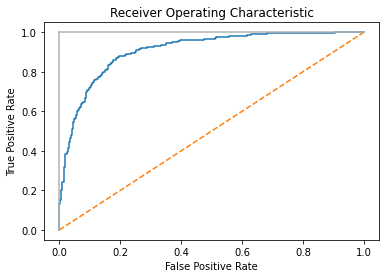

In [30]:
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [33]:
# Get predicted probabilities
logit.predict_proba(features_test)[:1]

array([[0.86891533, 0.13108467]])

In this example, the first observation has an ~87% chance of being in the negative
class (0) and a 13% chance of being in the positive class (1).

In [34]:
# see the class
logit.classes_

array([0, 1])

The ROC curve represents the respective TPR and FPR for every probability thres‐
hold. For example, in our solution a threshold of roughly 0.50 has a TPR of \0.81 and an
FPR of \0.15:

In [36]:
print("Threshold:", threshold[116])
print("True Positive Rate:", true_positive_rate[116])
print("False Positive Rate:", false_positive_rate[116])

Threshold: 0.5331715230155316
True Positive Rate: 0.810204081632653
False Positive Rate: 0.14901960784313725


However, if we increase the threshold to ~80% (i.e., increase how certain the model
has to be before it predicts an observation as positive) the TPR drops significantly but
so does the FPR:

In [37]:
print("Threshold:", threshold[45])
print("True Positive Rate:", true_positive_rate[45])
print("False Positive Rate:", false_positive_rate[45])

Threshold: 0.8189133876659292
True Positive Rate: 0.5448979591836735
False Positive Rate: 0.047058823529411764


In [38]:
# Calculate area under curve
roc_auc_score(target_test, target_probabilities)

0.9073389355742297

semakin besar nilai AUC maka pengklasifikasian semakin baik
* AUC = 0 -> BURUK
* AUC = 1 -> BAIK

### 11.6 Evaluating Multiclass Classifier Predictions
You have a model that predicts three or more classes and want to evaluate its performance.

In [3]:
# Generate features matrix and target vector
features, target = make_classification(n_samples = 10000,
                                         n_features = 3,
                                         n_informative = 3,
                                         n_redundant = 0,
                                         n_classes = 3,
                                         random_state = 1)

# Create logistic regression
logit = LogisticRegression()

# Cross-validate model using accuracy
cross_val_score(logit, features, target, scoring='accuracy')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

In [4]:
# Cross-validate model using macro averaged F1 score
cross_val_score(logit, features, target, scoring='f1_macro')

array([0.84061272, 0.82895312, 0.82625661, 0.81515121, 0.81992692])

* **makro** = Hitung rata-rata skor metrik untuk setiap kelas, dengan bobot masing-masing kelas sama.<br>
* **weighted** =
Hitung rata-rata skor metrik untuk setiap kelas, bobot setiap kelas proporsional
dengan ukurannya dalam data.<br>
* **mikro** = 
Hitung rata-rata skor metrik untuk setiap kombinasi kelas observasi.

### 11.7 Visualizing a Classifier’s Performance

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


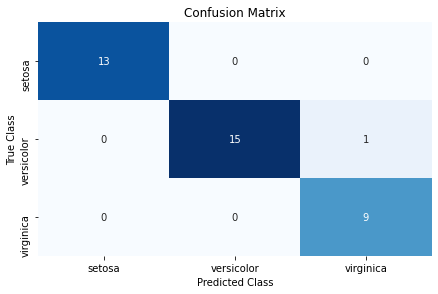

In [15]:
# Load data
iris = load_iris()

# Create feature and target
features, target = iris.data, iris.target

# Create list of target class names
class_names = iris.target_names

# Create training and test set
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=1)

# Create logistic regression
classifier = LogisticRegression()

# Train model and make predictions
target_predicted = classifier.fit(features_train, target_train).predict(features_test)

# Create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)

# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [16]:
matrix

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

### 11.8 Evaluating Regression Models

In [22]:
# Generate features matrix, target vector
features, target = make_regression(n_samples = 100,
                                     n_features = 3,
                                     n_informative = 3,
                                     n_targets = 1,
                                     noise = 50,
                                     coef = False,
                                     random_state = 1)

# Create a linear regression object
ols = LinearRegression()

# Cross-validate the linear regression using (negative) MSE
cross_val_score(ols, features, target, scoring='neg_mean_squared_error')

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

In [19]:
# Cross-validate the linear regression using R-squared
cross_val_score(ols, features, target, scoring='r2')

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

MSE is a
measurement of the squared sum of all distances between predicted and true values.

### 11.9 Evaluating Clustering Models

In [23]:
# Generate feature matrix
features, _ = make_blobs(n_samples = 1000,
                         n_features = 10,
                         centers = 2,
                         cluster_std = 0.5,
                         shuffle = True,
                         random_state = 1)

# Cluster data using k-means to predict classes
model = KMeans(n_clusters=2, random_state=1).fit(features)

# Get predicted classes
target_predicted = model.labels_

# Evaluate model
silhouette_score(features, target_predicted)

0.8916265564072142

<img src='shiloute.png'>

### 11.10 Creating a Custom Evaluation Metric

In [24]:
# Generate features matrix and target vector
features, target = make_regression(n_samples = 100,
                                   n_features = 3,
                                   random_state = 1)

# Create training set and test set
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.10, random_state=1)

# Create custom metric
def custom_metric(target_test, target_predicted):
    # Calculate r-squared score
    r2 = r2_score(target_test, target_predicted)
    # Return r-squared score
    return r2

# Make scorer and define that higher scores are better
score = make_scorer(custom_metric, greater_is_better=True)

# Create ridge regression object
classifier = Ridge()

# Train ridge regression model
model = classifier.fit(features_train, target_train)

# Apply custom scorer
score(model, features_test, target_test)

0.9997906102882058

In [25]:
# Predict values
target_predicted = model.predict(features_test)

# Calculate r-squared score
r2_score(target_test, target_predicted)

0.9997906102882058

### 11.11 Visualizing the Effect of Training Set Size
evaluate the effect of the number of observations in your training set on
some metric (accuracy, F1, etc.).

In [26]:
# Load data
digits = load_digits()

# Create feature matrix and target vector
features, target = digits.data, digits.target

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(# Classifier
                                                        RandomForestClassifier(),
                                                        # Feature matrix
                                                        features,
                                                        # Target vector
                                                        target,
                                                        # Number of folds
                                                        cv=10,
                                                        # Performance metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1,
                                                        # Sizes of 50
                                                        # training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))


# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

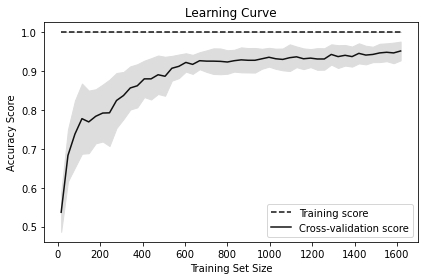

In [27]:
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

### 11.12 Creating a Text Report of Evaluation Metrics
quick description of a classifier’s performance.

In [31]:
# Load data
iris = load_iris()

# Create feature matrix
features = iris.data

# Create target vector
target = iris.target

# Create list of target class names
class_names = iris.target_names

# Create training and test set
features_train, features_test, target_train, target_test = train_test_split(
     features, target, random_state=1)

# Create logistic regression
classifier = LogisticRegression()

# Train model and make predictions
model = classifier.fit(features_train, target_train)
target_predicted = model.predict(features_test)

# Create a classification report
print(classification_report(target_test,
                            target_predicted,
                            target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 11.13 Visualizing the Effect of Hyperparameter Values
want to understand how the performance of a model changes as the value of
some hyperparameter changes.

In [32]:
# Load data
digits = load_digits()

# Create feature matrix and target vector
features, target = digits.data, digits.target

# Create range of values for parameter
param_range = np.arange(1, 250, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(
                                             # Classifier
                                             RandomForestClassifier(),
                                             # Feature matrix
                                             features,
                                             # Target vector
                                             target,
                                             # Hyperparameter to examine
                                             param_name="n_estimators",
                                             # Range of hyperparameter's values
                                             param_range=param_range,
                                             # Number of folds
                                             cv=3,
                                             # Performance metric
                                             scoring="accuracy",
                                             # Use all computer cores
                                             n_jobs=-1)

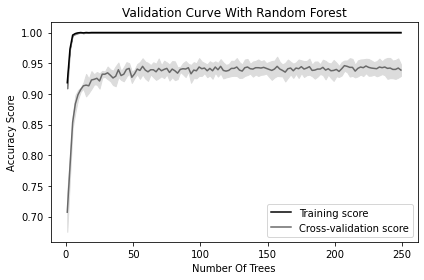

In [33]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std,
     train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std,
     test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

## 12. Model Selection
In machine learning, we use training algorithms to learn the parameters of a model
by minimizing some loss function.

### 12.1 Selecting Best Models Using Exhaustive Search
select the best model by searching over a range of hyperparameters.

In [8]:
# Load data
iris = load_iris()
features = iris.data
target = iris.target

# Create logistic regression
logistic = LogisticRegression()

# Create range of candidate penalty hyperparameter values
penalty = ['l1', 'l2']

# Create range of candidate regularization hyperparameter values
C = np.logspace(0, 4, 10)

# Create dictionary hyperparameter candidates
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search
gridsearch = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = gridsearch.fit(features, target)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Once GridSearchCV is complete, we can see the hyperparameters of the best model:

In [10]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 7.742636826811269


In [12]:
# Predict target vector
best_model.predict(features)

array([0, 0, 0, 0, 0])

### 12.2 Selecting Best Models Using Randomized Search

In [15]:
# Load data
iris = load_iris()
features = iris.data
target = iris.target

# Create logistic regression
logistic = LogisticRegression()

# Create range of candidate regularization penalty hyperparameter values
penalty = ['l1', 'l2']

# Create distribution of candidate regularization hyperparameter values
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create randomized search
randomizedsearch = RandomizedSearchCV(logistic, 
                                      hyperparameters, 
                                      random_state=1, 
                                      n_iter=100, 
                                      cv=5, 
                                      verbose=0,
                                      n_jobs=-1)

# Fit randomized search
best_model = randomizedsearch.fit(features, target)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
230 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
230 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: S

With RandomizedSearchCV, if we specify a distribution, scikit-learn will randomly
sample without replacement hyperparameter values from that distribution.

In [16]:
# Define a uniform distribution between 0 and 4, sample 10 values
uniform(loc=0, scale=4).rvs(10)

array([2.14929308, 0.61946033, 3.16224352, 2.14911885, 1.86795879,
       1.72715271, 3.37815269, 1.88820134, 3.48979884, 1.51215279])

Alternatively, if we specify a list of values such as two regularization penalty hyper‐
parameter values, ['l1', 'l2'], RandomizedSearchCV will randomly sample with
replacement from the list.

In [17]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 3.730229437354635


### 12.3 Selecting Best Models from Multiple Learning Algorithms
select the best model by searching over a range of learning algorithms
and their respective hyperparameters.

In [20]:
# Set random seed
np.random.seed(0)

# Load data
iris = load_iris()
features = iris.data
target = iris.target

# Create a pipeline
pipe = Pipeline([("classifier", RandomForestClassifier())])

# Create dictionary with candidate learning algorithms and their hyperparameters
search_space = [{"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l1', 'l2'],
                 "classifier__C": np.logspace(0, 4, 10)},
                 {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_features": [1, 2, 3]}]

# Create grid search
gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=0)

# Fit grid search
best_model = gridsearch.fit(features, target)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [21]:
# View best model
best_model.best_estimator_.get_params()["classifier"]

LogisticRegression(C=7.742636826811269)

### 12.4 Selecting Best Models When Preprocessing

In [26]:
# Set random seed
np.random.seed(0)

# Load data
iris = load_iris()
features = iris.data
target = iris.target

# Create a preprocessing object that includes StandardScaler features and PCA
preprocess = FeatureUnion([("std", StandardScaler()), ("pca", PCA())])

# Create a pipeline
pipe = Pipeline([("preprocess", preprocess),
                 ("classifier", LogisticRegression())])

# Create space of candidate values
search_space = [{"preprocess__pca__n_components": [1, 2, 3],
                 "classifier__penalty": ["l1", "l2"],
                 "classifier__C": np.logspace(0, 4, 10)}]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0, n_jobs=-1)

# Fit grid search
best_model = clf.fit(features, target)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual

In [27]:
# View best model
best_model.best_estimator_.get_params()['preprocess__pca__n_components']

2

### 12.5 Speeding Up Model Selection with Parallelization
You need to speed up model selection.

In [31]:
# Load data
iris = load_iris()
features = iris.data
target = iris.target

# Create logistic regression
logistic = LogisticRegression()

# Create range of candidate regularization penalty hyperparameter values
penalty = ["l1", "l2"]

# Create range of candidate values for C
C = np.logspace(0, 4, 1000)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search
gridsearch = GridSearchCV(logistic, hyperparameters, cv=5, n_jobs=-1, verbose=1)

# Fit grid search
best_model = gridsearch.fit(features, target)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5000 fits failed out of a total of 10000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueErro

### 12.6 Speeding Up Model Selection Using AlgorithmSpecific Methods

In [34]:
# Load data
iris = load_iris()
features = iris.data
target = iris.target

# Create cross-validated logistic regression
logit = LogisticRegressionCV(Cs=100)

# Train model
logit.fit(features, target)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegressionCV(Cs=100)

### 12.7 Evaluating Performance After Model Selection
evaluate the performance of a model found through model selection

In [36]:
# Load data
iris = load_iris()
features = iris.data
target = iris.target

# Create logistic regression
logistic = LogisticRegression()

# Create range of 20 candidate values for C
C = np.logspace(0, 4, 20)

# Create hyperparameter options
hyperparameters = dict(C=C)

# Create grid search
gridsearch = GridSearchCV(logistic, hyperparameters, cv=5, n_jobs=-1, verbose=0)

# Conduct nested cross-validation and outut the average score
cross_val_score(gridsearch, features, target).mean()

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9733333333333334